In [58]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

fig_folder= r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2024\03_MAR_2024\food_for_thought_march14\figs\\"

In [59]:
%run ..//source//FED_functions.py

In [60]:

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"} 

# cell below plots the timeline of pellet delivery of male-female data <font color = "yellow">pooled for NRPR and PRNR mice </font>


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


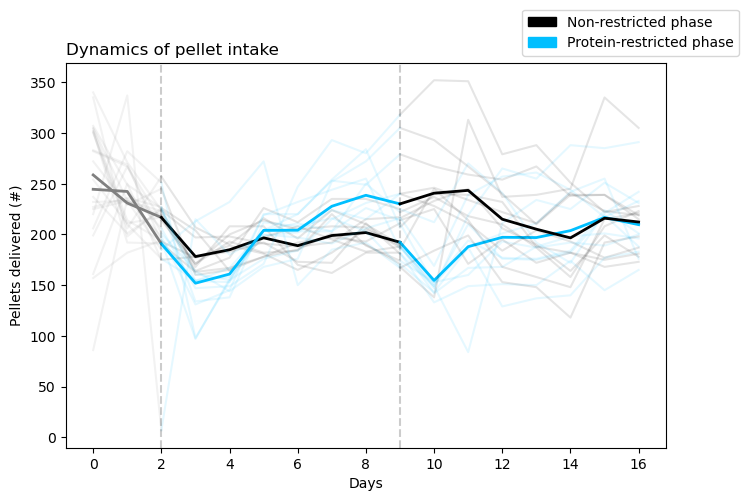

In [61]:
#plot shows timeline of total number of pellets delivered  per day in NRPR and PRNR male and Females pooled data
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=1, figsize=(8,5), gridspec_kw= {"left": 0.15})



pooled_data_ctl = np.concatenate((nrpr_m, nrpr_f))
pooled_data_exp = np.concatenate((prnr_m, prnr_f))
timeline_multicolor_fig([pooled_data_ctl,pooled_data_exp], colors=["black", "deepskyblue"], ylabel="Pellets delivered (#)",ax=ax)




ax.set_xlabel("Days", fontsize = 10)
ax.set_title("Dynamics of pellet intake", fontsize = 12, loc= "left")
#ax[0].set_title("Male", fontsize = 10, loc= "right")
   



#legends
fed_cols = ["black", "deepskyblue"]
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted phase')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted phase')
ax.legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1,1),
             bbox_transform=f.transFigure)

fig_folder= r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2024\03_MAR_2024\food_for_thought_march14\figs\\"
#f.savefig(fig_folder + "pellet_intake_timeline.png", dpi=300, bbox_inches="tight")



# cell below plots the timeline of pellet delivery of male-female data <font color = "yellow">pooled for NRPR and PRNR mice </font> and <font color = "red" >filters values under 100 and above 300 for a more pronounced visualization </font>


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


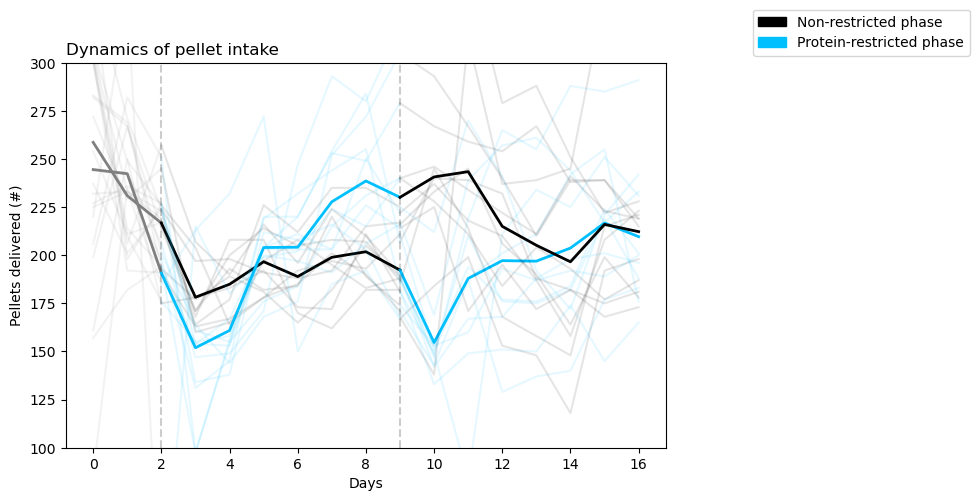

In [62]:
#plot shows timeline of total number of pellets delivered  per day in NRPR and PRNR male and Females pooled data
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=1, figsize=(8,5), gridspec_kw= {"left": 0.15})



pooled_data_ctl = np.concatenate((nrpr_m, nrpr_f))
pooled_data_exp = np.concatenate((prnr_m, prnr_f))
timeline_multicolor_fig([pooled_data_ctl,pooled_data_exp], colors=["black", "deepskyblue"], ylabel="Pellets delivered (#)",ax=ax)




ax.set_xlabel("Days", fontsize = 10)
ax.set_title("Dynamics of pellet intake", fontsize = 12, loc= "left")
#ax[0].set_title("Male", fontsize = 10, loc= "right")
# Filter data below 100 and above 300 pellets
ax.set_ylim(bottom=100)
ax.set_ylim(top=300)   



#legends
fed_cols = ["black", "deepskyblue"]
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted phase')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted phase')
ax.legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1,1),
             bbox_transform=f.transFigure)




# <font color = "magenta">Cells below adding code from Jaime's BNA 2023 script </font>

In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import trompy as tp

In [64]:
DATA_FOLDER = "..\\data"
df = pd.read_csv(os.path.join(DATA_FOLDER, "FED001_042322_00.CSV"))

def tweak_fed(df):
    
    return (df
            .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
            .assign(t=lambda df_: pd.to_datetime(df_.t))
            .set_index("t")
            .query("Event == 'Pellet'")
            .loc[:,"ipi"] # could use .loc[:,["ipi", "col2", "col5" etc]] to get mutliple columns, e.g. animal name etc
           )

pellets = tweak_fed(df) # could add animal name from metafile and diet and phase so these are returned in dataframe

In [65]:
# read in metafile and put pellets dataframe in keys of a dict
METAFILE = "..\\FEDProtein_METAFILE.xls"
rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE")

ff_dict = {}
for row in rows:
    file, mouse, diet, mode, sex, order = row
    if (mode == "FF") and (diet in ["NR", "PR"]):
        key = "_".join([mouse, diet])
        ff_dict[key] = {}
        ff_dict[key]["mouse"] = mouse
        ff_dict[key]["diet"] = diet
        ff_dict[key]["sex"] = sex
        ff_dict[key]["pellets"] = tweak_fed(pd.read_csv(os.path.join(DATA_FOLDER, file)))
    


In [6]:
# f, ax = plt.subplots()
# data = sns.distplot(trans_ipis)
# ax.set_xlabel("Interpellet interval (minutes)")
# ax.set_xticks([-2, -1, 0, 1, 2, 3], labels=["0.01", "0.1", "1", "10", "100", "1000"])

# ax.axvline(0, linestyle="--", color="grey", alpha=0.5)
# ax.text(0,1.8, "Meal threshold (1 min)", ha="center")

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# f.savefig(fig_folder + meal_def.png)

In [66]:
def make_ff_df(df, mouse, diet):
    """
    Takes df of pellets - time and IPIs - and returns row for collated df
    """
    out = pd.DataFrame.from_dict({"mouse": [mouse],
                                  "diet": [diet],
                                  "n_pellets": [len(df)],
                                  "n_meals": (df > 60).sum(),
                                  "session_time": (df.index[-1] - df.index[0]).total_seconds() / 60,
                                  "short_ipis": (df < 5).sum()
                                  })

    return (out
           .assign(meal_freq=lambda df_: 1 / (df_.session_time / df_.n_meals) * 60 * 24,
                   meal_size=lambda df_: df_.n_pellets / df_.n_meals,
                   )
           .astype({"diet": "category",
                    "n_pellets": "uint16",
                    "n_meals": "uint16"}))

ff = pd.DataFrame()

for key, val in ff_dict.items():
    
    pellets = val["pellets"]
    mouse = val["mouse"]
    diet = val["diet"]
    ff = pd.concat([ff, make_ff_df(pellets, mouse, diet)])
    
ff.reset_index(drop=True, inplace=True);


In [67]:
ff.groupby(by=["mouse", "diet"])

In [68]:
n_pellets = pd.pivot_table(ff, values="n_pellets", index="mouse", columns="diet")
meal_size = pd.pivot_table(ff, values="meal_size", index="mouse", columns="diet")
meal_freq = pd.pivot_table(ff, values="meal_freq", index="mouse", columns="diet")

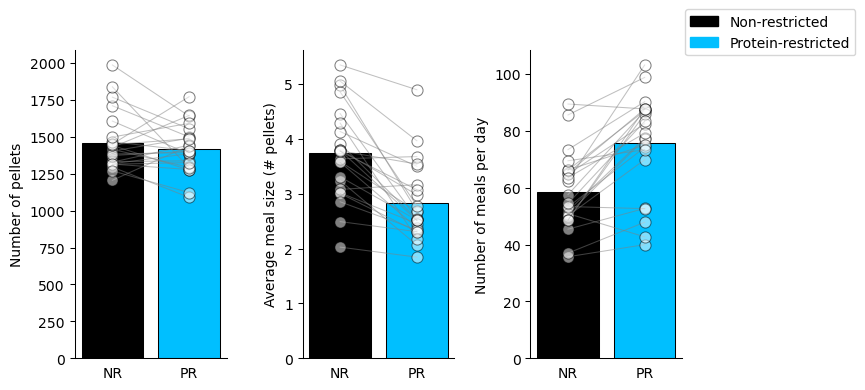

In [69]:
fed_cols = ["black", "deepskyblue"]
f, ax = plt.subplots(ncols = 3,
                     figsize=(9,4),
                     gridspec_kw={"wspace": 0.5, "right": 0.8})

for axis, vals in zip(ax, [n_pellets, meal_size, meal_freq]):
    tp.barscatter([vals.NR, vals.PR],
                  paired=True,
                  barfacecolor=fed_cols,
                  barfacecolor_option="individual",
                  barlabels=["NR", "PR"],
                  sc_kwargs={"alpha": 0.5},
                  ax=axis);
    
ax[0].set_ylabel("Number of pellets")
ax[1].set_ylabel("Average meal size (# pellets)")
ax[2].set_ylabel("Number of meals per day")

# legend
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted')

ax[2].legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1, 1),
             bbox_transform=f.transFigure)

#f.savefig(fig_folder + "meal_micro.png")

In [70]:
HOARDING_METAFILE = "..\\FEDProtein_METAFILE.xls"
df = pd.read_excel(HOARDING_METAFILE, sheet_name="HOARDING")

def tweak_hoarding(df):
    
    return (df
            .drop(columns=["day0", "day1", "day2"])
            .rename(columns={"mouseid": "mouse"})
            .assign(
                    diet=["PRNR"] * 6 + ["NRPR"] * 6 + ["PRNR"] * 6 + ["NRPR"] * 5)
            .astype({"diet": "category"})
            .astype({"day{}".format(n): "int8" for n in range(3,17)})
           )
    
hoard = tweak_hoarding(df)


C:\Users\admin\AppData\Local\Temp\ipykernel_59940\1775993826.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hoard_grouped = pd.pivot_table(hoard, index=["mouse", "diet"])
C:\Users\admin\AppData\Local\Temp\ipykernel_59940\1775993826.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  PRNR = hoard.groupby(by="diet").mean(numeric_only=True).loc["PRNR"]
C:\Users\admin\AppData\Local\Temp\ipykernel_59940\1775993826.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

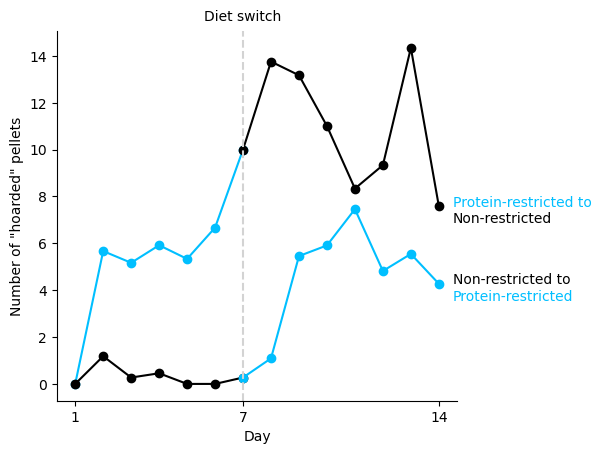

In [71]:
hoard_grouped = pd.pivot_table(hoard, index=["mouse", "diet"])

fed_cols = ["black", "deepskyblue"]

PRNR = hoard.groupby(by="diet").mean(numeric_only=True).loc["PRNR"]
NRPR = hoard.groupby(by="diet").mean(numeric_only=True).loc["NRPR"]

PRNR_sem = hoard.groupby(by="diet").sem(numeric_only=True).loc["PRNR"]

ph1_x = range(0,7)
ph2_x = range(6,14)

f, ax = plt.subplots(gridspec_kw={"right": 0.75})

ax.plot(ph1_x, PRNR[:7], color=fed_cols[1], marker="o")
ax.plot(ph2_x, PRNR[6:], color=fed_cols[0], marker="o")

ax.plot(ph1_x, NRPR[:7], color=fed_cols[0], marker="o")
ax.plot(ph2_x, NRPR[6:], color=fed_cols[1], marker="o")

ax.text(13.5, PRNR[-1], "Protein-restricted to", color=fed_cols[1])
ax.text(13.5, PRNR[-1]-0.7, "Non-restricted", color=fed_cols[0])

ax.text(13.5, NRPR[-1], "Non-restricted to", color=fed_cols[0])
ax.text(13.5, NRPR[-1]-0.7, "Protein-restricted", color=fed_cols[1])

ax.set_ylabel('Number of "hoarded" pellets')
ax.set_xticks([0, 6, 13], labels=["1", "7", "14"])
ax.set_xlabel("Day")


ax.axvline(6, color="lightgrey", linestyle="--")
ax.text(6, 15.5, "Diet switch", ha="center")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#f.savefig(fig_folder + "hoarding.png")

In [72]:
# read in metafile and put pellets dataframe in keys of a dict
METAFILE = "..\\FEDProtein_METAFILE.xls"
rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE")

def tweak_eco(df, event="Left"):
    
    return (df
            .rename(columns={"MM:DD:YYYY hh:mm:ss": "t"})
            .assign(t=lambda df_: pd.to_datetime(df_.t))
            .set_index("t")
            .query("Event == @event")
            .loc[:,"FR"]           
           )

eco_dict = {}
for row in rows:
    file, mouse, diet, mode, sex, order = row
    if (mode == "ECO") and (diet in ["PR", "RICH"]):
        key = "_".join([mouse, diet])
        eco_dict[key] = {}
        eco_dict[key]["mouse"] = mouse
        eco_dict[key]["diet"] = diet
        eco_dict[key]["sex"] = sex
        eco_dict[key]["FR"] = tweak_eco(pd.read_csv(os.path.join(DATA_FOLDER, file)))
    

In [73]:
def get_FR_reset_index(df):
    
    return (df
            .reset_index()
            .query("FR == 1")
            .reset_index()
            ["index"]   
           )

def get_breakpoints(df):
    
    return (df
            .iloc[get_FR_reset_index(df)[1:] - 1]
           )

def make_eco_df(df, mouse, diet):
    """
    Takes df of FRs and returns row for collated df
    """
    out = pd.DataFrame.from_dict({"mouse": [mouse],
                                  "pellet_type": [diet],
                                  "n_pellets": [(df == 1).sum()],
                                  "breakpoint": [np.mean(get_breakpoints(df))]
                                 }
                                )

    return (out
           .astype({"pellet_type": "category",
                    "n_pellets": "uint16",
                    })
           )
                                  
eco_df = pd.DataFrame()

for key, val in eco_dict.items():
    
    fr = val["FR"]
    mouse = val["mouse"]
    diet = val["diet"]
    eco_df = pd.concat([eco_df, make_eco_df(fr, mouse, diet)])
    
eco_df.reset_index(drop=True, inplace=True);
eco_df = eco_df.assign(diet=["NR"] * 12 + ["PR"] * 12)


In [20]:
n_pellets = pd.pivot_table(eco_df, values="n_pellets", index=["mouse", "diet"], columns="pellet_type")
breakpoint = pd.pivot_table(eco_df, values="breakpoint", index=["mouse", "diet"], columns="pellet_type")
# meal_freq = pd.pivot_table(ff, values="meal_freq", index="mouse", columns="diet")

In [22]:
#breakpoint.xs("NR", level=1)

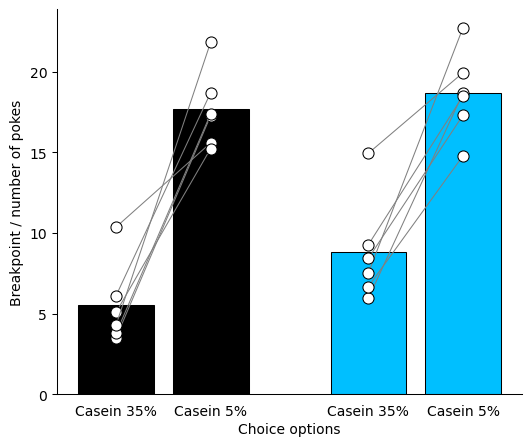

In [54]:
fed_cols = ["black", "black", "deepskyblue", "deepskyblue"]
f, ax = plt.subplots(ncols = 1,
                     figsize=(6,5),
                     gridspec_kw={"wspace": 0.9})


NR = breakpoint.xs("NR", level=1)
PR = breakpoint.xs("PR", level=1)

tp.barscatter([[NR.RICH, NR.PR],
               [PR.RICH, PR.PR]
              ],
              paired=True,
              barfacecolor=fed_cols,
              barfacecolor_option="individual",
              barlabels=["Casein 35%", "Casein 5%", "Casein 35%", "Casein 5%"],
              ax=ax);


ax.set_ylabel("Breakpoint / number of pokes")
ax.set_xlabel("Choice options", labelpad = 20)
#ax.axhline(5.5, color="magenta")

f.savefig(fig_folder + "breakpoint.png")